<a href="https://colab.research.google.com/github/AmarSamanta/mylearning/blob/main/trainvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the first problem for machine learning tutorials
We will use vapor pressure as a function of temperature data for various compounds for machine learning.

In [1]:
import numpy as np
import pandas as pd

I will load vapor_pressures.csv file using pandas from google drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


# File is in Colab Notebooks folder
# file_path = '/content/drive/MyDrive/Colab Notebooks/Vapor_pressures.csv' # Update with your file path

file_path = 'https://raw.githubusercontent.com/AmarSamanta/mylearning/refs/heads/main/Vapor_pressures.csv'

try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

#drive.flush_and_unmount()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41730 entries, 0 to 41729
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      41730 non-null  object 
 1   CAS-RN    40170 non-null  object 
 2   Formula   41730 non-null  object 
 3   SMILES    41730 non-null  object 
 4   T         41730 non-null  float64
 5   Pvap      41730 non-null  float64
 6   KDB_ID    41730 non-null  int64  
 7   Class     41730 non-null  object 
 8   Subclass  41730 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.9+ MB


let us find out the name of the components available in the database

In [4]:
from collections import OrderedDict
cname=df['Name'].tolist()
# removing the duplicates from the list maintaining same order
cname=list(OrderedDict.fromkeys(cname).keys())
print(cname)

['METHANE', 'ETHANE', 'PROPANE', 'N-BUTANE', 'N-PENTANE', 'N-HEXANE', 'N-HEPTANE', 'N-OCTANE', 'N-NONANE', 'N-DECANE', 'N-UNDECANE', 'N-DODECANE', 'N-TRIDECANE', 'N-TETRADECANE', 'N-PENTADECANE', 'N-HEXADECANE', 'N-HEPTADECANE', 'N-OCTADECANE', 'N-NONADECANE', 'N-EICOSANE', 'N-HENEICOSANE', 'N-DOCOSANE', 'N-TRICOSANE', 'N-TETRACOSANE', 'N-PENTACOSANE', 'N-HEXACOSANE', 'N-HEPTACOSANE', 'N-OCTACOSANE', 'N-DOTRIACONTANE', 'N-TRITRIACONTANE', 'N-HEXATRIACONTANE', 'ISOBUTANE', 'ISOPENTANE', 'NEOPENTANE', '2-METHYLPENTANE', '3-METHYLPENTANE', '2,2-DIMETHYLBUTANE', '2,3-DIMETHYLBUTANE', '2-METHYLHEXANE', '3-METHYLHEXANE', '3-ETHYLPENTANE', '2,2-DIMETHYLPENTANE', '2,3-DIMETHYLPENTANE', '2,4-DIMETHYLPENTANE', '3,3-DIMETHYLPENTANE', '2,2,3-TRIMETHYLBUTANE', '2-METHYLHEPTANE', '3-METHYLHEPTANE', '4-METHYLHEPTANE', '3-ETHYLHEXANE', '2,2-DIMETHYLHEXANE', '2,3-DIMETHYLHEXANE', '2,4-DIMETHYLHEXANE', '2,5-DIMETHYLHEXANE', '3,3-DIMETHYLHEXANE', '3,4-DIMETHYLHEXANE', '2-METHYL-3-ETHYLPENTANE', '3-METHYL

Extract vapor pressure data for a given compound name in a new dataframe

In [5]:
dfm=df[df['Name']=='METHANE'][['Pvap', 'T']]
dfm['lnP'] = np.log10(dfm['Pvap'])
dfm['invT'] = 1/dfm['T']
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pvap    30 non-null     float64
 1   T       30 non-null     float64
 2   lnP     30 non-null     float64
 3   invT    30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


<Axes: xlabel='invT', ylabel='lnP'>

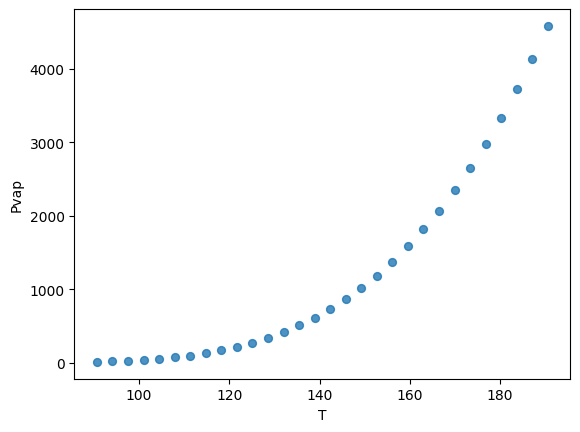

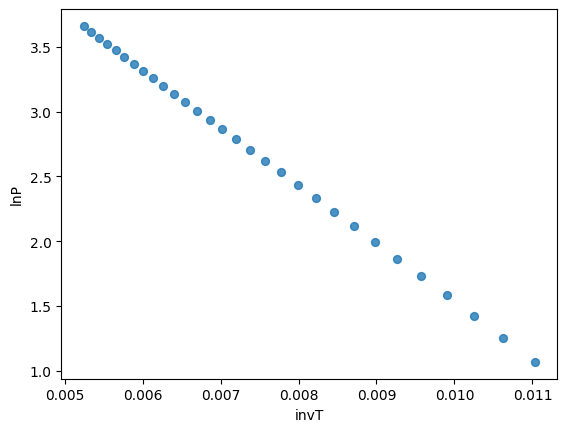

In [6]:
from matplotlib import pyplot as plt
# @title  T vs Pvap and T vs logPvap
dfm.plot(kind='scatter', x='T', y='Pvap', s=32, alpha=.8)
# @title  1/T vs logPvap
dfm.plot(kind='scatter', x='invT', y='lnP', s=32, alpha=.8)


machine learning the vapor pressure data for this compound using scikit-learn

R-squared: 0.8484272710426123


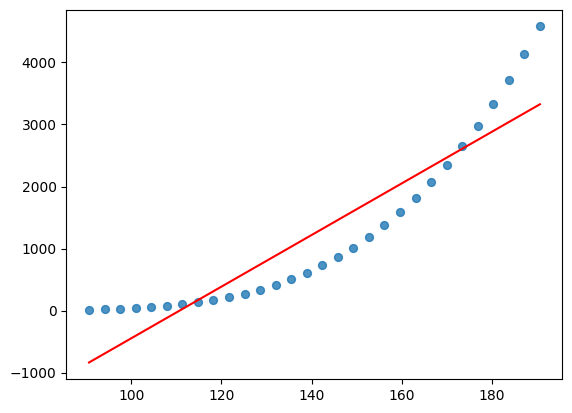

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Try linear regression
X=dfm[['T']]
y=dfm['Pvap']
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
r2=r2_score(y,y_pred)
print(f"R-squared: {r2}")
plt.scatter(X,y,s=32,alpha=.8)
plt.plot(X,y_pred,color='red')

As expected, linear regression will not give good result with poor R-squared value. Now try with log Pvap with 1/T.

R-squared: 0.9999842098807361


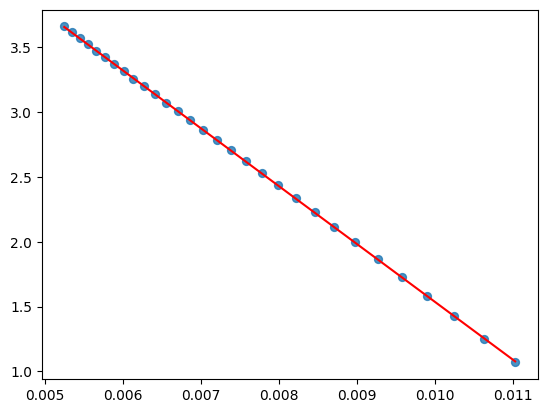

In [8]:
# Prepare the data for the linear regression model
X = dfm[['invT']]  # Features (independent variable)
y = dfm['lnP']     # Target (dependent variable)
model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")
plt.scatter(X, y, s=32, alpha=.8)
plt.plot(X, y_pred, color='red')

Now log of Pvap with 1/T gives perfect linear fit. But we have considered entire datasets for the regression. The better way to split the dataset as training and test datasets is to develop the model using the training dataset, and validate with the test dataset.

R-squared: 0.9999705547802312


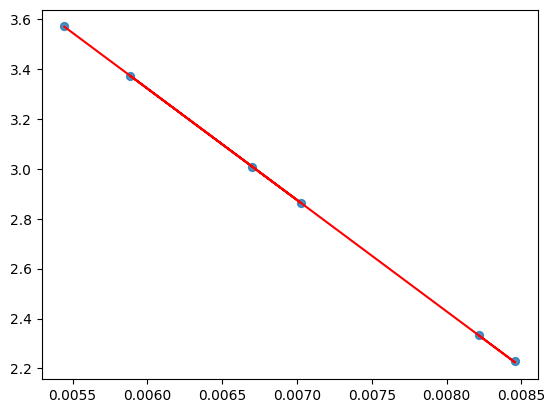

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
plt.scatter(X_test, y_test, s=32, alpha=.8)
plt.plot(X_test, y_pred, color='red')

We now include log of Pvap as lnP and 1/T as invT in the dataframe df so that we can plot lnP vs 1/T for all compounds

<Axes: xlabel='invT', ylabel='lnP'>

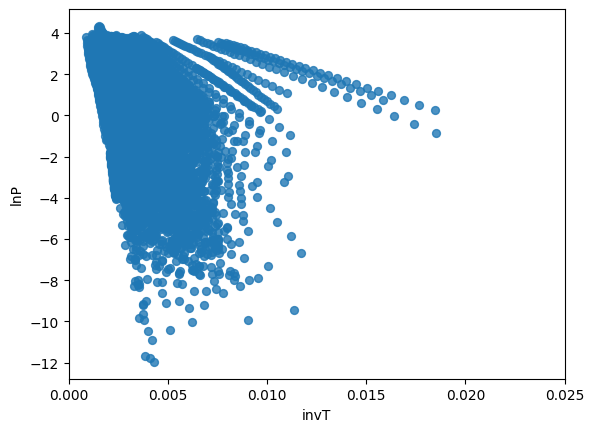

In [10]:
df['lnP']=np.log10(df['Pvap'])
df['invT']=1/df['T']
df.plot(kind='scatter', x='invT', y='lnP', xlim=[0,0.025],s=32, alpha=.8)

Machine learning and Predicting vapor pressure from temperature is a trivial problem for a given single compound. However, this relationship will not be valid for all other compounds as evidenced from the above plot. We need to have relationship which includes also compound property. The challenge is to predict the vapor pressure of any compound using a machine learned model.
In the next section, we will first develop molecular fringerprint to prepare the compound for machine learning. In the CSV file and df dataframe, SMILES rpresentation of compounds are provided. SMILE is a string representation of a compound. The details on SMILE can be found [here](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system). We will develop fringerprint based on SMILES. We will use datamol and rdkit libraries for this purpose.

In [11]:
if 'google.colab' in str(get_ipython()):
  !pip install rdkit
  !pip install datamol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.4 MB/s eta 0:00:00


creating fingerprint from SMILE data using datamol library

In [12]:
# importing datamol libraries
import datamol as dm
def get_fp(mol, fp_type='topological'):
    return dm.to_fp(mol, fp_type=fp_type)

df['MOL']=df['SMILES'].apply(dm.to_mol)
# Neglect the WARNING: not removing hydrogen atom without neighbors
df['FP']=df['MOL'].apply(get_fp)

[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not removing hydrogen atom without neighbors
[20:09:58] WARNING: not r

The Fingerprint of the compounds are now added to dataframe. We will now prepare the datasets for machine learning. Our input vectors will be fingerprint and 1/T and the target vector will be Pvap.
We will break the datasets using the chemical class provided in the dataset.

In [13]:
chem_cl=df['Class'].unique()
comp_train, comp_test, comp_valid =[], [], []
for cl in chem_cl:
  df_cl=df[df['Class']==cl]
  comp_cl= df_cl['Name'].unique()
  comp_train_cl, comp_test_cl = train_test_split(comp_cl, test_size=0.2, random_state=0)
  comp_train_cl, comp_valid_cl = train_test_split(comp_train_cl, test_size=0.2, random_state=1)
  comp_train.extend(comp_train_cl)
  comp_test.extend(comp_test_cl)
  comp_valid.extend(comp_valid_cl)

Create the train, test and valid dataset.
Scaling of temperature data gives better learning

In [14]:
train_df=df[df['Name'].isin(comp_train)].reset_index()
test_df=df[df['Name'].isin(comp_test)].reset_index()
valid_df=df[df['Name'].isin(comp_valid)].reset_index()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df['invT'].to_numpy().reshape(-1,1))

train_df['T_scaled'] = scaler.transform(train_df['invT'].to_numpy().reshape(-1,1))
valid_df['T_scaled'] = scaler.transform(valid_df['invT'].to_numpy().reshape(-1,1))
test_df['T_scaled'] = scaler.transform(test_df['invT'].to_numpy().reshape(-1,1))

X_train=np.vstack(train_df['FP'].tolist())
XT=train_df['T_scaled'].to_numpy().reshape(-1,1)
X_train=np.hstack((X_train,XT))
y_train=train_df['lnP'].to_numpy().reshape(-1,1)

X_test=np.vstack(test_df['FP'].tolist())
XT=test_df['T_scaled'].to_numpy().reshape(-1,1)
X_test=np.hstack((X_test,XT))
y_test=test_df['lnP'].to_numpy().reshape(-1,1)

X_valid=np.vstack(valid_df['FP'].tolist())
XT=valid_df['T_scaled'].to_numpy().reshape(-1,1)
X_valid=np.hstack((X_valid,XT))
y_valid=valid_df['lnP'].to_numpy().reshape(-1,1)


Let us now build the deep neural network

In [62]:
# prompt: build a deep neural network model using sklearn

from sklearn.neural_network import MLPRegressor

# Assuming X_train, y_train, X_test, y_test, X_valid, y_valid are defined from the previous code
mse,r2=[],[]
nh=[50]
for n in nh:
# Initialize and train the MLPRegressor model
    model = MLPRegressor(hidden_layer_sizes=(int(n),int(n/2)), activation='relu', solver='adam', max_iter=1000, random_state=42)
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)

# Evaluate the model
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))
    print(n,mse)


50 [0.8788958608603177]


20 [1.080349300293266]
30 [1.080349300293266, 0.8845145882128334]

model statistics, Prediction and view

Mean Squared Error: 0.8788958608603177
R-squared: 0.7367597999303679


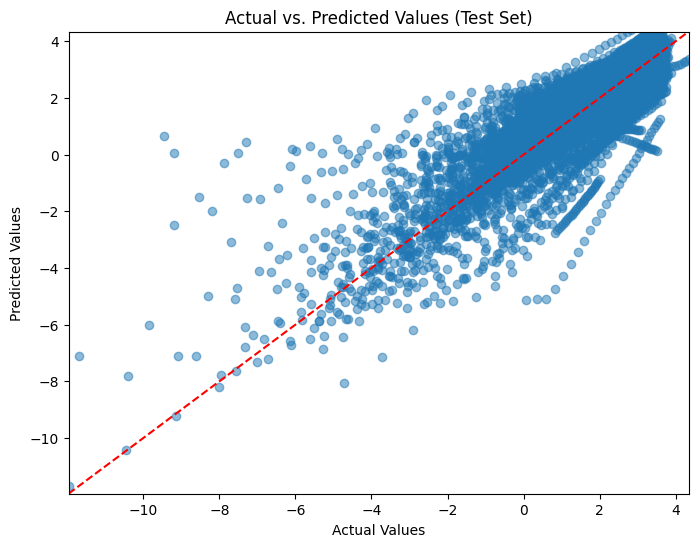

In [63]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Set)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.axis([min(y_test), max(y_test),min(y_test), max(y_test)]) # Set the aspect ratio to be equal
plt.show()
nnmodel=model

Solving the same problem with decision tree

Decision Tree - Mean Squared Error: 1.4393692133810947
Decision Tree - R-squared: 0.5688910864438277


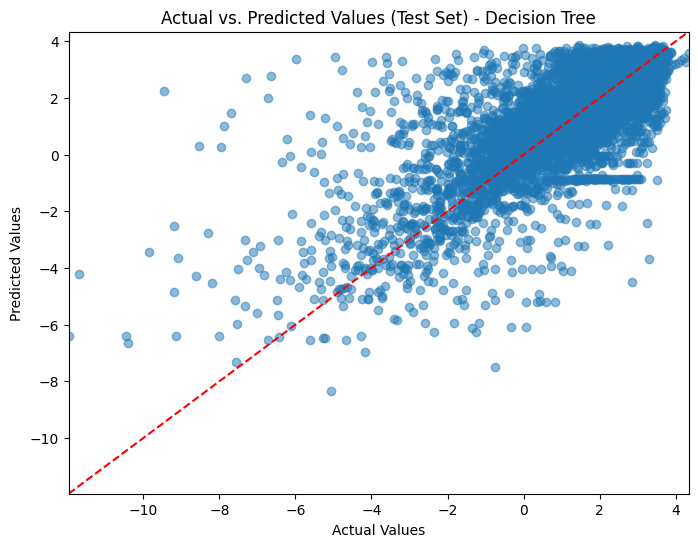

In [64]:
# prompt: generate a code to learn the same using decision tree

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed
dt_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree - Mean Squared Error: {dt_mse}")
print(f"Decision Tree - R-squared: {dt_r2}")

# Plot predictions vs. actual values for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Set) - Decision Tree")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.axis([min(y_test), max(y_test),min(y_test), max(y_test)])
plt.show()

Random Forest - Mean Squared Error: 1.009616199638775
Random Forest - R-squared: 0.6976074388081666


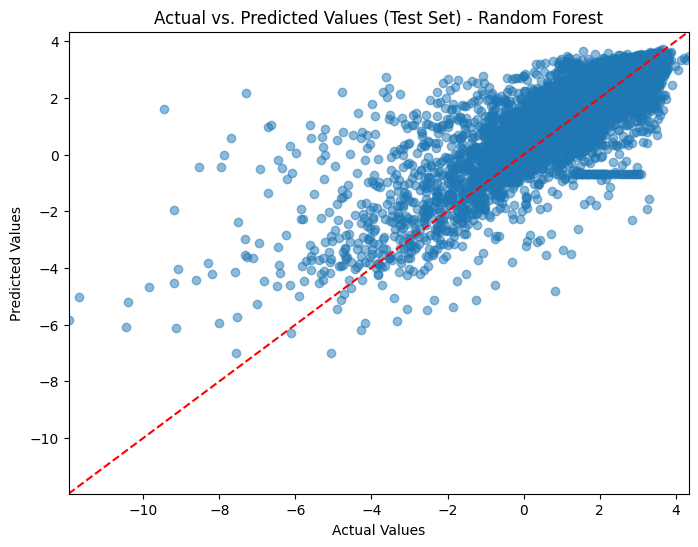

In [35]:
# prompt: generate a code to learn the same using random forest

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # You can adjust hyperparameters
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R-squared: {rf_r2}")

# Plot predictions vs. actual values for the Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Set) - Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.axis([min(y_test), max(y_test),min(y_test), max(y_test)])
plt.show()

XGBoost - Mean Squared Error: 0.8258841809488559
XGBoost - R-squared: 0.7526374548919702


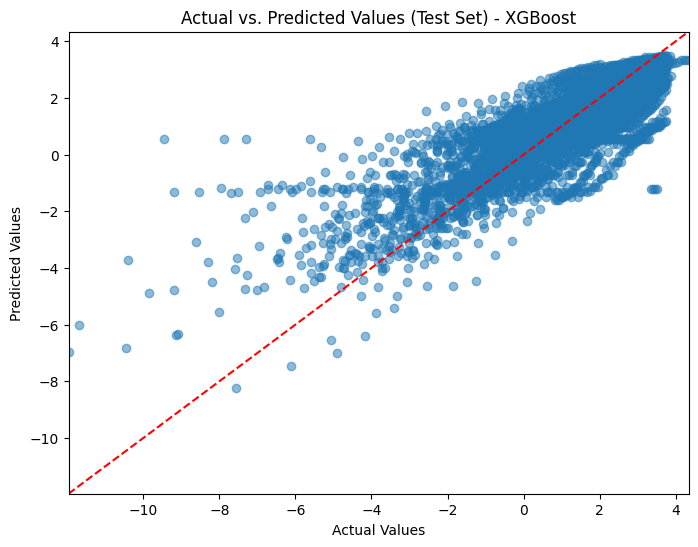

In [93]:
!pip install xgboost

import xgboost as xgb

# Assuming X_train, y_train, X_test, y_test are defined from the previous code

# Create XGBoost DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Use appropriate objective function for regression
    'eval_metric': 'rmse',  # Use RMSE as evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum tree depth
    # Add other relevant parameters as needed
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xg_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xg_model.predict(dtest)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - Mean Squared Error: {mse}")
print(f"XGBoost - R-squared: {r2}")

# Plot predictions vs. actual values for the XGBoost model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Set) - XGBoost")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.axis([min(y_test), max(y_test),min(y_test), max(y_test)])
plt.show()

In [94]:
# Predict Pvap with T using trained model and transformation in the code above, take name of the compound and temperature as input
# Assuming all the previous code is executed and the necessary variables (df, scaler, model, etc.) are defined.


def predict_pvap(model_type,compound_name, temperature):
    """Predicts the vapor pressure (Pvap) of a compound at a given temperature using a trained model.

    Args:
        model_type (str): The type of model to use for prediction.
        compound_name: The name of the compound.
        temperature: The temperature in Kelvin.

    Returns:
        The predicted vapor pressure (Pvap) in the same units as in the original dataset, or None if the prediction fails.
    """

    # Find the compound in the dataframe.
    try:
      compound_data = df[df['Name'] == compound_name]
      if compound_data.empty:
          return None  # Handle case where the compound isn't found

      # Get the first SMILES string for the compound (assuming only one exists per compound name)
      smiles = compound_data['SMILES'].iloc[0]

      # Generate molecular fingerprint for the input compound
      mol = dm.to_mol(smiles)
      fp = dm.to_fp(mol,fp_type='topological')
      fp = np.array(fp).reshape(1, -1) # Reshape to a 2D array for prediction

      # Scale temperature
      inv_temp = 1/temperature
      temp_scaled = scaler.transform(np.array([[inv_temp]]))
      input_data = np.hstack((fp,temp_scaled))

      # Make Prediction. Use the best performing model from previous analysis
      match model_type:
        case 'nn':
          model=nnmodel
          predicted_lnP = model.predict(input_data)
        case 'dt':
          model=dt_model
          predicted_lnP = model.predict(input_data)
        case 'rf':
          model=rf_model
          predicted_lnP = model.predict(input_data)
        case 'xgb':
          model=xg_model
          predicted_lnP = model.predict(xgb.DMatrix(input_data))


      # Transform the prediction back to Pvap
      predicted_Pvap = 10**predicted_lnP[0]
      return predicted_Pvap

    except (KeyError, IndexError) as e:
      print(f"An error occurred: {e}")
      return None
    except Exception as e:
        print(f"An unexpected error occurred during prediction: {e}")
        return None


# Example Usage
compound = "WATER"
temp = 373
predicted_pvap = predict_pvap('nn',compound,temp)
if predicted_pvap is not None:
  print(f"Predicted Pvap for {compound} at {temp} K: {predicted_pvap}")
else:
  print(f"Prediction for {compound} failed.")

Predicted Pvap for WATER at 373 K: 342.6944980221914


In [83]:
Input panel containing model type, compound name, temperature as slider

import ipywidgets as widgets
from IPython.display import display


# Assuming 'cname' and 'predict_pvap' are defined from the previous code

# Create a dropdown widget for compound selection
compound_dropdown = widgets.Dropdown(
    options=cname,
    value=cname[0],  # Default value
    description='Compound:'
)
# Create a dropdown widget for model selection
model_dropdown = widgets.Dropdown(
    options=['nn', 'dt', 'rf', 'xgb'],
    value='nn',  # Default value
    description='Model:'
)

# Create a slider widget for temperature
temperature_slider = widgets.FloatSlider(
    value=273.15,  # Default value (0 degrees Celsius)
    min=0,
    max=500,  # Adjust as needed
    step=1,
    description='Temperature (K):'
)

# Create an output widget to display the predicted vapor pressure
output = widgets.Output()

def on_value_change(change):
  with output:
    output.clear_output()  # Clear previous output
    model_type = model_dropdown.value
    compound_name = compound_dropdown.value
    temperature = temperature_slider.value
    predicted_pvap_value = predict_pvap(model_type,compound_name, temperature)
    if predicted_pvap_value is not None:
        print(f"Predicted Pvap for {compound_name} at {temperature} K: {predicted_pvap_value}")
    else:
        print(f"Prediction for {compound_name} failed.")

# Observe changes in the dropdown and slider values
model_dropdown.observe(on_value_change, names='value')
compound_dropdown.observe(on_value_change, names='value')
temperature_slider.observe(on_value_change, names='value')

# Display the widgets
display(model_dropdown, compound_dropdown, temperature_slider, output)

Dropdown(description='Model:', options=('nn', 'dt', 'rf', 'xgb'), value='nn')

Dropdown(description='Compound:', options=('METHANE', 'ETHANE', 'PROPANE', 'N-BUTANE', 'N-PENTANE', 'N-HEXANE'…

FloatSlider(value=273.15, description='Temperature (K):', max=500.0, step=1.0)

Output()

In [92]:
df[df['Name'] =='WATER'][['T','Pvap']]

,T,Pvap
41100,274.150000,0.653537
41101,287.006897,1.579500
41102,299.863793,3.503429
41103,312.720690,7.212984
41104,325.577586,13.915857
41105,338.434483,25.360643
41106,351.291379,43.956552
41107,364.148276,72.883234
41108,377.005172,116.183500
41109,389.862069,178.834134
